In [1]:
#typical ML imports (from NN example ipynb)
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
from glob import glob

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import *
from tensorflow.keras import Sequential
#from utils import * 

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

plt.rcParams['savefig.dpi'] = 400
plt.rcParams['font.size'] = 13
plt.rcParams["legend.frameon"] = False

2022-12-29 12:41:50.143851: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
# Python file with supporting sub-functions
import data_utils

# Open and Check CESM Data

In [3]:
# Define ens (ensemble) and member (member number) so that all subsequent lines would be valid in a loop for a testbed approach
ens = 'CESM'
member = '009'

# Define date range
# In this case, CESM from 1982-2017 and SOCAT from 1970-2022, so keep CESM full range and will trim SOCAT
date_start = '1982-02'
date_end = '2017-01'
# LATER: check input[each] date and lat/lon and make sure all coming in reasonably

In [10]:
CESM_data, XCO2_data, possible_variables_list = data_utils.import_model_data(ens, member, date_start, date_end)

In [11]:
CESM_data

<xarray.Dataset>
Dimensions:     (xlon: 360, ylat: 180, time: 420)
Coordinates:
  * xlon        (xlon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * ylat        (ylat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * time        (time) datetime64[ns] 1982-02-15 1982-03-15 ... 2017-01-15
Data variables:
    SSS         (time, ylat, xlon) float32 ...
    SST         (time, ylat, xlon) float32 ...
    MLD         (time, ylat, xlon) float32 ...
    Chl         (time, ylat, xlon) float32 ...
    pCO2        (time, ylat, xlon) float64 ...
    socat_mask  (time, ylat, xlon) float64 ...
    net_mask    (time, ylat, xlon) float32 ...
Attributes:
    long_name:     Sea Surface Salinity
    units:         gram/kilogram
    grid_loc:      3111
    cell_methods:  time: mean z_t: mean

In [ ]:
# XCO2_data

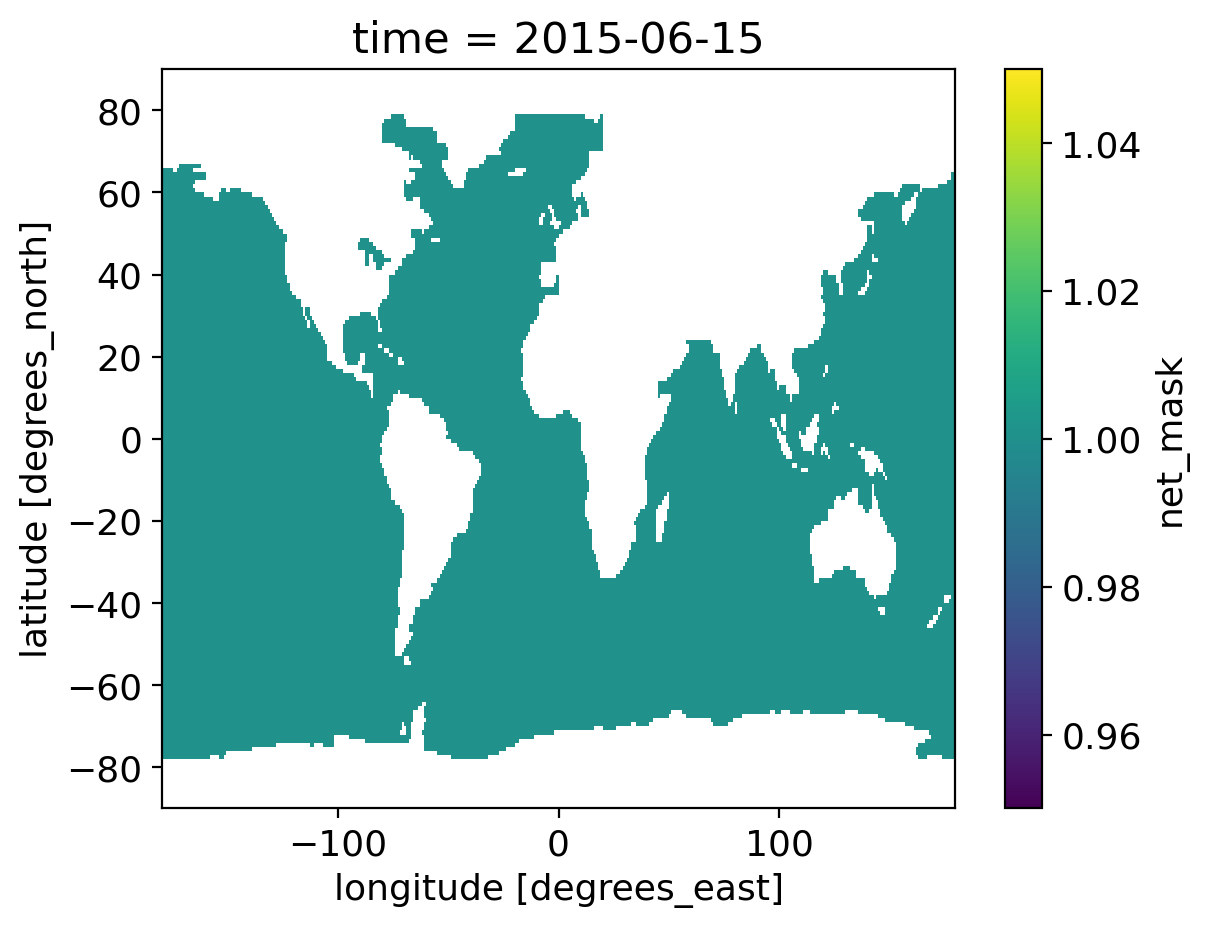

In [12]:
CESM_data.net_mask[400,:,:].plot()

In [ ]:
# possible_variables_list

In [ ]:
CESM_data.SSS[400,:,:].plot()

In [ ]:
type(CESM_data)

In [ ]:
# CESM_data.ylat

In [ ]:
# CESM_data.xlon

In [13]:
dates = CESM_data.time.values
N_batch = 12

CESM_data_plus_features = data_utils.create_features(CESM_data, XCO2_data, N_time=len(dates), N_batch = N_batch) 

In [14]:
CESM_data_plus_features

<xarray.Dataset>
Dimensions:     (xlon: 360, ylat: 180, time: 420)
Coordinates:
  * xlon        (xlon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * ylat        (ylat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * time        (time) datetime64[ns] 1982-02-15 1982-03-15 ... 2017-01-15
Data variables: (12/13)
    SSS         (time, ylat, xlon) float32 ...
    SST         (time, ylat, xlon) float32 ...
    MLD         (time, ylat, xlon) float32 ...
    Chl         (time, ylat, xlon) float32 ...
    pCO2        (time, ylat, xlon) float64 ...
    socat_mask  (time, ylat, xlon) float64 ...
    ...          ...
    XCO2        (time, ylat, xlon) float32 340.8 340.8 340.8 ... 407.0 407.0
    T0          (time) float64 0.7025 0.2926 -0.2345 ... 0.7147 0.9668 0.9668
    T1          (time) float64 0.7117 0.9562 0.9721 ... -0.6995 -0.2554 0.2554
    A           (ylat) float64 -1.0 -0.9997 -0.999 -0.9981 ... 0.999 0.9997 1.0
    B           (xlon, ylat) float64 -7.615e-05 -0.0002284 ... 7.615e-05
    C           (xlon, ylat) float64 0.008726 0.02618 ... 0.02618 0.008726
Attributes:
    long_name:     Sea Surface Salinity
    units:         gram/kilogram
    grid_loc:      3111
    cell_methods:  time: mean z_t: mean

In [ ]:
# If need in dataframe form:

# df_CESM = CESM_data_plus_features.to_dataframe()
# df_CESM

## Final Step needs to be saving as a netcdf in /home/julias/MLEE-final-project/proc_data

In [15]:
import datetime

In [16]:
del CESM_data_plus_features.attrs['long_name']
del CESM_data_plus_features.attrs['units']
del CESM_data_plus_features.attrs['grid_loc']

In [17]:
CESM_data_plus_features.attrs['description'] = "Community Earth System Model (CESM) Member 009 Data, downloaded via fileshare testbed and pre-processed by import_data.ipynb"
CESM_data_plus_features.attrs['Date'] = str(datetime.datetime.now())
CESM_data_plus_features.attrs['Created By'] = "Julia Simpson"
CESM_data_plus_features.attrs['cell_methods'] = 'Note that XCO2 is only avaliable over time, and a global representation is extrapolated'

In [18]:
CESM_data_plus_features

<xarray.Dataset>
Dimensions:     (xlon: 360, ylat: 180, time: 420)
Coordinates:
  * xlon        (xlon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * ylat        (ylat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * time        (time) datetime64[ns] 1982-02-15 1982-03-15 ... 2017-01-15
Data variables: (12/13)
    SSS         (time, ylat, xlon) float32 ...
    SST         (time, ylat, xlon) float32 ...
    MLD         (time, ylat, xlon) float32 ...
    Chl         (time, ylat, xlon) float32 ...
    pCO2        (time, ylat, xlon) float64 ...
    socat_mask  (time, ylat, xlon) float64 ...
    ...          ...
    XCO2        (time, ylat, xlon) float32 340.8 340.8 340.8 ... 407.0 407.0
    T0          (time) float64 0.7025 0.2926 -0.2345 ... 0.7147 0.9668 0.9668
    T1          (time) float64 0.7117 0.9562 0.9721 ... -0.6995 -0.2554 0.2554
    A           (ylat) float64 -1.0 -0.9997 -0.999 -0.9981 ... 0.999 0.9997 1.0
    B           (xlon, ylat) float64 -7.615e-05 -0.0002284 ... 7.615e-05
    C           (xlon, ylat) float64 0.008726 0.02618 ... 0.02618 0.008726
Attributes:
    cell_methods:  Note that XCO2 is only avaliable over time, and a global r...
    description:   Community Earth System Model (CESM) Member 009 Data, downl...
    Date:          2022-12-29 12:46:08.680057
    Created By:    Julia Simpson

In [19]:
CESM_data_plus_features.to_netcdf('/home/julias/MLEE-final-project/proc_data/proc_data_2D_mon_CESM_009_1x1_198202-201701.nc') 

# Access SOCAT Data from Artemis

In [ ]:
#look at Val's pre SOCAT py file

path_SST = '/local/data/artemis/observations/NOAA_OI_SSTv2/processed/sst_1x1_mon_NOAAOIv2_198112-201908.nc'

path_SSS = '/local/data/artemis/observations/EN422_salinity/processed/sss_1x1_mon_EN422_197901-202012.nc'

path_xCO2 = #'https://gml.noaa.gov/ccgg/mbl/'
#make sure includes lat lon variations (via pressure field) and water vapor correction
# using pressure:
path_pres = '/local/data/artemis/observations/ERA5_MSLP/ERA5_MSLP_1x1_1979-2021.nc' #make sure in atmospheres
#expect 300 to 450 depending on year

path_chlA = '/local/data/artemis/observations/GlobColour/processed/globcolour-L3m-GSM_chl_1x1_monthly_198201-202112.nc'

path_MLD = '/local/data/artemis/observations/MLD_deBoyerMontegut/val_processed/mld_deboyer_1x1_clim_198201-201712.nc'
#LOOK AT Val's code, should be able to just add additional years, see if jan 2017 same as jan 2000
path_pCO2 = '/local/data/artemis/observations/SOCAT/processed/SOCATv2022_pCO2_gridded_monthly.nc'
#IF need to add CESM, /local/data/artemis/observations/CESM_hindcast/processed 

#ds1 = xr.open_dataset(‘/data/artemis/workspace/vbennington/GlobColour/originals/L3m_GLOB_CHL1_199801-202012.nc’)
#ds2 = xr.open_dataset(‘/data/artemis/workspace/afay/GlobColour/originals/L3m_GLOB_CHL1_202001-202112.nc’)

In [ ]:
df = ldeo_res_flux
lon = df.lon
print(lon.shape)
lon2 = np.where(lon < 0, lon+360, lon)
# # print(lon2)
df.coords['lon'] = (lon2)
df = df.sortby(df.lon)
# # print(df)
df[300,:,:].plot()
# # print(df.lon)
ldeo_res_flux360 = df
print(ldeo_res_flux360.dims)
print(ldeo_res_flux360.shape)
del df

In [ ]:
ds_pCO2 = xr.open_dataset(path_pCO2)
ds_SST = xr.open_dataset(path_SST)
ds_chlA = xr.open_dataset(path_chlA)

In [ ]:
print(ds_chlA) #NOTE WILL NEED TO STANDARDIZE LONGITUDE, and will need to standardize time
# check Val's scripts for time and lon conversions
# define a function for switching longitudes, see Amanda's example

In [ ]:
print(ds_pCO2)

In [ ]:
ds_pCO2.socat_mask.plot()

In [ ]:
dickson = pd.read_csv('/data/artemis/workspace/vbennington/Dickson_atmos/Dickson_monthly_pco2.csv')

In [ ]:
dickson.head() #only varies with time, not lat and lon

In [ ]:
# take time series of xCO2 and multiply by time and space-varying pressure